In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

<h3>Task 1: Loading and Inspecting the data </h3>

a dataset of audiobooks downloaded from audible.in from 1998 to 2025 (pre-planned releases). [Source](https://www.kaggle.com/datasets/snehangsude/audible-dataset)

In [3]:
audible = pd.read_csv('archive/audible_raw.csv')

audible.info()
audible.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


💾 The data
- "name" - The name of the audiobook.
- "author" - The audiobook's author.
- "narrator" - The audiobook's narrator.
- "time" - The audiobook's duration, in hours and minutes.
- "releasedate" - The date the audiobook was published.
- "language" - The audiobook's language.
- "stars" - The average number of stars (out of 5) and the number of ratings (if available).
- "price" - The audiobook's price in INR (Indian Rupee).

<h3> Task 2: Clean text data in Author and Narrator columns </h3>

- start cleaning some of the text columns like author and narrator.
- remove the Writtenby: and Narratedby: portions of the text in those columns.
- Add space between first name and last name

In [4]:
audible['author'] = audible['author'].str.replace('Writtenby:', '')
audible['narrator'] = audible['narrator'].str.replace('Narratedby:', '')

audible['author'].head()

0    GeronimoStilton
1        RickRiordan
2         JeffKinney
3        RickRiordan
4        RickRiordan
Name: author, dtype: object

In [5]:
audible['author'] = audible['author'].str.replace( r"([A-Z])", r" \1").str.strip()
audible['narrator'] = audible['narrator'].str.replace( r"([A-Z])", r" \1").str.strip()
audible[['author', 'narrator']].head()

,author,narrator
0,GeronimoStilton,BillLobely
1,RickRiordan,RobbieDaymond
2,JeffKinney,DanRussell
3,RickRiordan,SoneelaNankani
4,RickRiordan,JesseBernstein


<h3>Task 3: Extract number of stars and ratings from Stars column.</h3>

The stars column combines the number of stars and the number of ratins. Let's turn this into numbers and split it into two columns: rating_stars and n_ratings.

In [6]:
#Take a look on how the column is it

audible['stars'].sample(n=10)

40609    Not rated yet
75176    Not rated yet
18481    Not rated yet
76066    Not rated yet
80983    Not rated yet
31988    Not rated yet
83448    Not rated yet
2356     Not rated yet
15728    Not rated yet
81911    Not rated yet
Name: stars, dtype: object

In [7]:
#Filter to only show the rowns that have ratings

audible[audible['stars'] != 'Not rated yet'].stars.sample(n=10)

27932        5 out of 5 stars1 rating
7556      5 out of 5 stars572 ratings
12860       3 out of 5 stars2 ratings
34125     4.5 out of 5 stars3 ratings
60338    4.5 out of 5 stars19 ratings
23       4.5 out of 5 stars25 ratings
21545        4 out of 5 stars1 rating
83465        4 out of 5 stars1 rating
58644     3.5 out of 5 stars2 ratings
83308       5 out of 5 stars4 ratings
Name: stars, dtype: object

In [8]:
#Replace the not rated columns for NaN

audible['stars'].replace('Not rated yet', np.nan, inplace=True)

audible['stars'].isna().sample(n=10)

16049     True
65650     True
41515     True
60762     True
8931      True
23079    False
44531    False
11649     True
17354     True
66602     True
Name: stars, dtype: bool

In [9]:
# Extract number of stars into rating_stars and turn into float
audible['rating_stars'] = audible['stars'].str.extract('^([\d.]+)').astype(float)
audible['stars'].head()

0       5 out of 5 stars34 ratings
1     4.5 out of 5 stars41 ratings
2     4.5 out of 5 stars38 ratings
3     4.5 out of 5 stars12 ratings
4    4.5 out of 5 stars181 ratings
Name: stars, dtype: object

In [10]:
# Extract number of rating into n_ratings and turn into float
audible['n_ratings'] = audible['stars'].str.replace(',', '').str.extract('(\d+) rating').astype(float)
audible[['rating_stars', 'n_ratings']].head()

,rating_stars,n_ratings
0,5.0,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0


In [11]:
#Remove the old column 
audible.drop(columns=['stars'],  axis=1, inplace=True)
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          87489 non-null  object 
 1   author        87489 non-null  object 
 2   narrator      87489 non-null  object 
 3   time          87489 non-null  object 
 4   releasedate   87489 non-null  object 
 5   language      87489 non-null  object 
 6   price         87489 non-null  object 
 7   rating_stars  15072 non-null  float64
 8   n_ratings     15072 non-null  float64
dtypes: float64(2), object(7)
memory usage: 6.0+ MB


<h3> Task 4: Change data types </h3>
Another important step is to have our data in the correct data types

- Set price to float
- Turn rating_stars to category
- Convert releasedate to datetime

First step will be set price into float

In [12]:
#Taking a look at the data
audible['price'].sample(n=10)

5845      13.00
21165    333.00
76087    586.00
23461    586.00
86713    227.00
45450    703.00
27468    586.00
24523    762.00
32258    837.00
1053     267.00
Name: price, dtype: object

In [13]:
audible['price'] = audible['price'].str.replace(',','')

In [14]:
#Verify if theres is only numbers
non_numeric_lines = audible[audible['price'].str.contains(r'[^0-9.]')]
non_numeric_lines['price'].unique()

array(['Free'], dtype=object)

In [15]:
#Replacing the string free for 0
audible['price'] = audible['price'].str.replace('Free', '0')

# Turn price to float
audible['price'] = audible.price.astype(float)

Then, turn rating starts to category

All values of categorical data are either in categories or np.nan. Order is defined by the order of categories, not lexical order of the values. 

In [16]:
audible.rating_stars.unique()

array([5. , 4.5, 4. , nan, 3.5, 3. , 1. , 2. , 2.5, 1.5])

In [17]:
audible['rating_stars'] = audible.rating_stars.astype('category')

In [18]:
audible['rating_stars'].unique()

[5.0, 4.5, 4.0, NaN, 3.5, 3.0, 1.0, 2.0, 2.5, 1.5]
Categories (9, float64): [1.0, 1.5, 2.0, 2.5, ..., 3.5, 4.0, 4.5, 5.0]

Convert releasedate date to datetime

In [19]:
audible['releasedate'] = pd.to_datetime(audible['releasedate'])

audible.info()


C:\Users\narelle.santana\AppData\Local\Temp\ipykernel_3544\2164304727.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  audible['releasedate'] = pd.to_datetime(audible['releasedate'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   price         87489 non-null  float64       
 7   rating_stars  15072 non-null  category      
 8   n_ratings     15072 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 5.4+ MB


<h3>Task 5: Extract hours and minutes from the time column</h3>

The time column combines the number of hours and minutes into one column. We want to transform and consolidate the information into a new time_minutes column.

In [20]:
# Explore the values in the time column
audible.time.sample(n=10)

15066               26 mins
42925     5 hrs and 22 mins
399         1 hr and 9 mins
69800     4 hrs and 43 mins
74798     9 hrs and 54 mins
61127     8 hrs and 12 mins
6987                10 mins
73033    10 hrs and 30 mins
6253      5 hrs and 53 mins
87481     6 hrs and 52 mins
Name: time, dtype: object

In [21]:
#Search the entries in the time column for different spellings of min. Let' try min, mins, minutes

audible.time[audible.time.str.contains('minute')].sample(n=5)

87106    Less than 1 minute
87148    Less than 1 minute
87058    Less than 1 minute
67097    Less than 1 minute
87129    Less than 1 minute
Name: time, dtype: object

In [22]:
audible.time[audible.time.str.contains('min')].sample(n=5)

62318     4 hrs and 30 mins
42344      1 hr and 42 mins
7436                19 mins
5194                42 mins
24565    12 hrs and 36 mins
Name: time, dtype: object

In [23]:
audible.time[audible.time.str.contains('hr')].sample(n=5)

22375      1 hr and 44 mins
27005     9 hrs and 10 mins
72872      1 hr and 24 mins
46349    10 hrs and 19 mins
15342     11 hrs and 6 mins
Name: time, dtype: object

fix the following:

- hr, hrs -> consolidate as hr
- min, mins -> consolidate as min
- Less than 1 minute -> round to 1 min

In [24]:
audible.time = audible.time.str.replace('hrs', 'hr')
audible.time = audible.time.str.replace('mins', 'min')
audible.time = audible.time.str.replace('Less than a minute', '1 min')

In [25]:
audible.time.sample(n=10)

19042     3 hr and 44 min
2219               30 min
86508     1 hr and 18 min
497                13 min
36994     2 hr and 16 min
12099              30 min
70343     4 hr and 25 min
3192               10 min
66981     6 hr and 11 min
65268    10 hr and 41 min
Name: time, dtype: object

The next step is to extract the number of hours and minutes from the text, then combine in a new time_mins column.

In [26]:
hours = audible.time.str.extract('(\d+) hr').fillna(0).astype(int)
mins = audible.time.str.extract('(\d+) min').fillna(0).astype(int)

In [27]:
# Combine hours and minutes into the time_mins column
audible['time_mins'] = hours * 60 + mins

audible['time_mins'].sample(n=10)

59228    719
68501    951
59012    228
83153    725
72946    411
80916    524
64353    450
49155     32
40207    523
6773       6
Name: time_mins, dtype: int32

In [28]:
# Drop the time column
audible.drop(columns=['time'], axis=1, inplace=True)

In [29]:
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   releasedate   87489 non-null  datetime64[ns]
 4   language      87489 non-null  object        
 5   price         87489 non-null  float64       
 6   rating_stars  15072 non-null  category      
 7   n_ratings     15072 non-null  float64       
 8   time_mins     87489 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 5.1+ MB


<h3>Task 6: Check data ranges</h3>

Another important step is to confirm that the values in our columns are in the expected ranges and that we don't have out-of-range values.

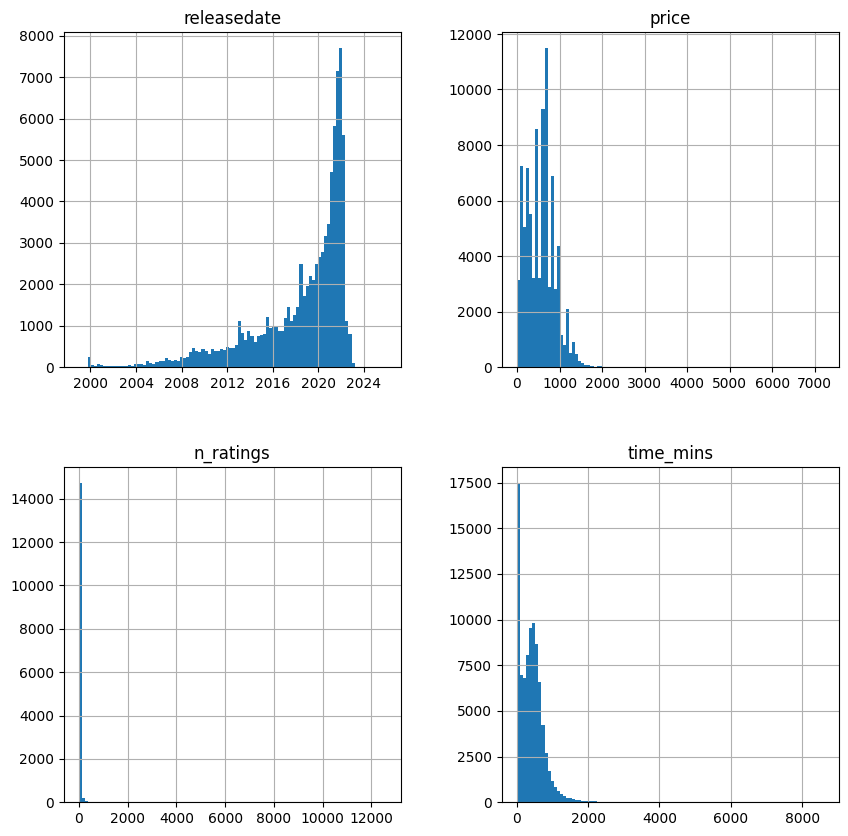

In [30]:
# Plot histograms of all the numerical columns
audible.hist(figsize=(10,10), bins=100)
plt.show()

In [31]:
audible.describe()

,releasedate,price,n_ratings,time_mins
count,87489,87489.000000,15072.000000,87489.000000
mean,2018-06-22 01:35:29.780886528,559.009246,21.613190,417.497663
min,1998-12-27 00:00:00,0.000000,1.000000,1.000000
25%,2016-08-30 00:00:00,268.000000,1.000000,142.000000
50%,2020-01-30 00:00:00,585.000000,2.000000,386.000000
75%,2021-08-04 00:00:00,755.000000,7.000000,584.000000
max,2025-11-14 00:00:00,7198.000000,12573.000000,8595.000000
std,NaN,336.096642,207.479634,364.559399


In [32]:
# Look at the non numeric columns
audible.describe(exclude=[np.number])

,name,author,narrator,releasedate,language,rating_stars
count,87489,87489,87489,87489,87489,15072.0
unique,82767,48374,29717,NaN,36,9.0
top,The Art of War,"矢島雅弘,石橋遊",anonymous,NaN,English,5.0
freq,20,874,1034,NaN,61884,6761.0
mean,NaN,NaN,NaN,2018-06-22 01:35:29.780886528,NaN,NaN
min,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,2016-08-30 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,2020-01-30 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,2021-08-04 00:00:00,NaN,NaN
max,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN


We will transform the prices in price to USD. 

We can use the exchange rate of 1 USD = 0.012 INR:

In [33]:
audible.price = audible.price * 0.012


# Check the results
audible.price.describe()

count    87489.000000
mean         6.708111
std          4.033160
min          0.000000
25%          3.216000
50%          7.020000
75%          9.060000
max         86.376000
Name: price, dtype: float64

In [34]:
audible.language.unique()

array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

In [35]:
audible['language'] = audible.language.str.capitalize()

# Check the results
audible.language.unique()

array(['English', 'Hindi', 'Spanish', 'German', 'French', 'Catalan',
       'Swedish', 'Italian', 'Danish', 'Finnish', 'Dutch', 'Hebrew',
       'Russian', 'Polish', 'Galician', 'Afrikaans', 'Icelandic',
       'Romanian', 'Japanese', 'Tamil', 'Portuguese', 'Urdu', 'Hungarian',
       'Czech', 'Bulgarian', 'Mandarin_chinese', 'Basque', 'Korean',
       'Arabic', 'Greek', 'Turkish', 'Ukrainian', 'Slovene', 'Norwegian',
       'Telugu', 'Lithuanian'], dtype=object)

<h3>Task 7: Checking for duplicates</h3>

In [36]:
audible.duplicated().sum()

0

It is useful to look for duplicates only using a subset of the columns that make sense. We will use the following subset of columns:

- name
- author
- narrator
- time_mins
- price

In [37]:
subset_cols = ['name', 'author', 'narrator', 'time_mins', 'price']

audible.duplicated(subset=subset_cols).sum()

70

In [38]:
# Check the duplicated rows keeping the duplicates and order by the name column
audible[audible.duplicated(subset=subset_cols, keep=False)].sort_values(by='name')

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_mins
63978,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-14,German,2.796,NaN,NaN,144
63965,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-23,German,2.796,NaN,NaN,144
24625,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2015-09-25,English,7.032,NaN,NaN,495
24116,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2020-10-15,English,7.032,NaN,NaN,495
16971,Adagio in Dm,BillBrown,BillBrown,2021-06-08,English,5.472,NaN,NaN,78
16964,Adagio in Dm,BillBrown,BillBrown,2021-08-17,English,5.472,NaN,NaN,78
69956,Ambiance,RasmusBroe,RasmusBroe,2021-06-16,French,2.700,NaN,NaN,269
69779,Ambiance,RasmusBroe,RasmusBroe,2021-11-29,French,2.700,NaN,NaN,269
35942,Atomic Habits,JamesClear,JamesClear,2018-10-18,English,9.840,5.0,12569.0,335
62272,Atomic Habits,JamesClear,JamesClear,2018-10-18,English,9.840,5.0,12573.0,335


In [39]:
audible.drop_duplicates(subset=subset_cols, keep='last', inplace=True)

# Check again for duplicates using our subset of columns
audible.duplicated(subset=subset_cols).sum()

0

<h3>Task 8: Dealing with missing data</h3>

In [41]:
audible.isna().sum()

name                0
author              0
narrator            0
releasedate         0
language            0
price               0
rating_stars    72387
n_ratings       72387
time_mins           0
dtype: int64

<h3>Task 9: Save the cleaned dataset</h3>

In [42]:
# Save the dataframe to a new file: 'audible_clean.csv'
audible.to_csv('archive/audible_clean.csv', index=False)